### Import librairies and modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from PIL import Image
from sklearn.metrics import accuracy_score

### Data preprocessing

#### Load data

###### You can download the dataset from kaggle: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Train

###### The data have the .csv files, but I worked by .npy files.
###### Here's an example of how to convert a .csv file to .npy file:

In [34]:
# Read the CSV file into a pandas DataFrame
#data = pd.read_csv('your_file.csv')

# Convert the DataFrame to a NumPy array
#numpy_array = data.to_numpy()

# Save the NumPy array to a .npy file
#np.save('output_array.npy', numpy_array)

In [5]:
GTSRB_data = np.load('RTSRB_Dataset/GTSRB_Data.npy')
GTSRB_labels = np.load('RTSRB_Dataset/GTSRB_Labels.npy')
df_meta = pd.read_csv('RTSRB_Dataset/Meta.csv')

#### About the GTSRB dataset

###### The GTSRB (German Traffic Sign Recognition Benchmark) dataset is a popular benchmark used for testing and developing machine learning models for traffic sign recognition. It contains almost 40 000 of 25X25 RGB images of 42 different traffic signs, such as speed limits, pedestrian crossings, and other road signs commonly found on German roads.

In [32]:
total_nbr_img = GTSRB_data.shape[0]
img_size = GTSRB_data.shape[1:]
nbr_labels = max(GTSRB_labels)

print(f"The tolal number of image in the dataset:{total_nbr_img}")
print(f"The size of an image: {img_size}")
print(f"The number of labels: {nbr_labels}")

The tolal number of image in the dataset:39209
The size of an image: (25, 25, 3)
The number of labels: 42


In [31]:
img_size = GTSRB_data.shape[1:]
img_size

(25, 25, 3)

#### Split data (80% for the training, and 20% for dev/test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(GTSRB_data, GTSRB_labels, test_size=0.2, random_state=42)

#### Normalize the data

In [8]:
X_train = X_train / 255
X_test = X_test / 255

#### Display the data

In [12]:
# Function to display multiple images
def display_imgs(img_list, titles_list=None, cols=2, cmap='gray', fig_size=(10, 10)):
    """ Function to display muliple images:
        arg1(img_list): list of the images.
        arg2(titles): titles of the images, if they're available, default value: None.
        arg3(cols): nbr of columns to displaying the images, default value: 2.
        arg4(cmap): color map, default value: gray.
        arg5(fig_size): the size of the figure,  default value: (10,10)"""

    nbr_images = len(img_list)
    rows = int(nbr_images / cols)

    fig = plt.figure(figsize=fig_size)

    for i, image in enumerate(img_list):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(image, cmap=cmap)
        if titles_list:
            plt.title(titles_list[i])
    plt.show()

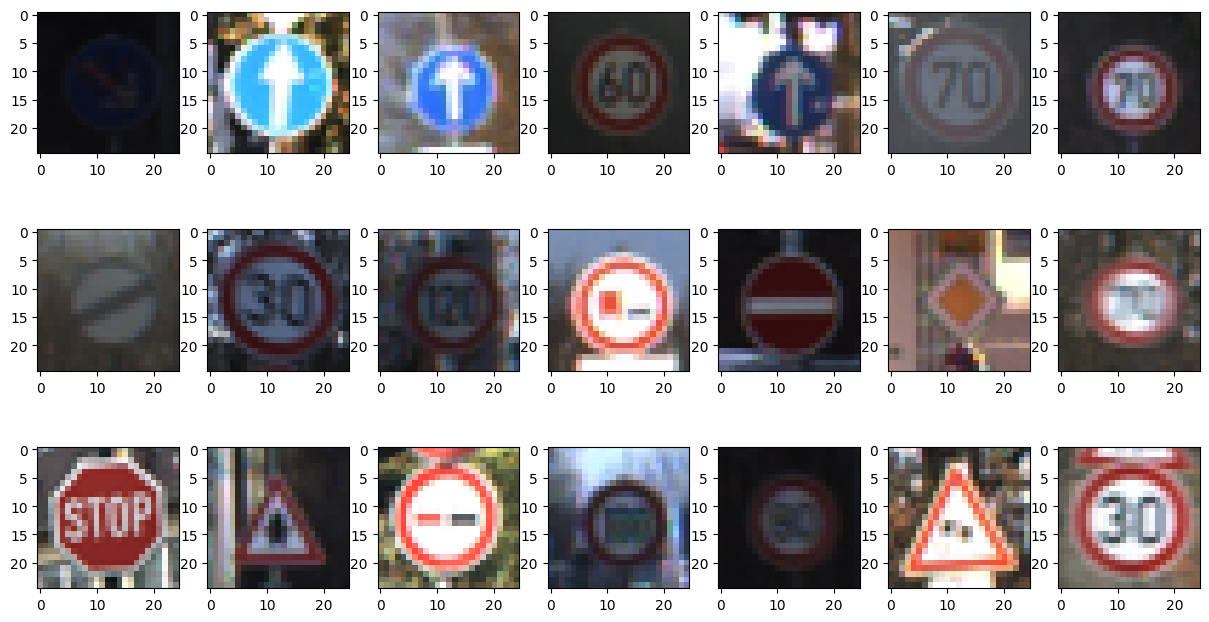

In [52]:
start_index = 12
end_index = 33
display_imgs(X_train[start_index:end_index], cols=7, fig_size=(15, 8))

#### Data augmentation

In [19]:
# Generate more images from the orginal images using the ImageDataGenerator module
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
                             featurewise_std_normalization=False,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10.)
# Fit the X_train data in the data generator
datagen.fit(X_train)

### Build and implement the CNN model

In [20]:
CNN_model = keras.Sequential([
            keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(25, 25, 3), name='Conv01'),
            keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(25, 25, 3), name='Conv02'),
            keras.layers.MaxPooling2D(2, 2),
            keras.layers.Dropout(0.2),

            keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv11'),
            keras.layers.Conv2D(128, (3, 3), activation='relu', name='Conv12'),
            keras.layers.MaxPooling2D(2, 2),
            keras.layers.Dropout(0.2),

            keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name='Conv21'),
            keras.layers.Conv2D(256, (3, 3),  activation='relu', name='Conv22'),
            keras.layers.MaxPooling2D(2, 2),
            keras.layers.Dropout(0.2),

            keras.layers.Flatten(),
            keras.layers.Dense(512, activation='relu', name='Dense1'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(43, activation='softmax', name = 'Output')
])

In [21]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv01 (Conv2D)             (None, 25, 25, 64)        1792      
                                                                 
 Conv02 (Conv2D)             (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 Conv11 (Conv2D)             (None, 11, 11, 128)       73856     
                                                                 
 Conv12 (Conv2D)             (None, 9, 9, 128)         147584    
                                                        

#### Compile the model by sepecifying the optimizer and loss function to be used

In [22]:
CNN_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

#### Train the model

In [ ]:
batch_size = 64
epochs = 10
history = CNN_model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              verbose=1)

#### Save the model

In [ ]:
CNN_model.save('trafic_sign_recognizer')

#### Confusion matrix

In [ ]:
y_pred_pro = CNN_model.predict(X_test, batch_size=64)
y_pred_cl = np.argmax(y_pred_pro, axis=1)
pd.DataFrame(confusion_matrix(y_test, y_pred_cl))

#### Load the model and evaluate it using the test data

In [26]:
loaded_model = keras.models.load_model('trafic_sign_recognizer')
loaded_model.evaluate(X_test, y_test, batch_size=64)

123/123 [==============================] - 6s 45ms/step - loss: 2.1398 - accuracy: 0.9844


[2.139756917953491, 0.9844427704811096]

### Predict traffic sign

In [32]:
def pred_class(x):
    '''Function to predict the classes for a test samples'''
    if len(x.shape) == 3:
    x = x.reshape(1, 25, 25, 3)
    model_output = loaded_model.predict(x)
    predicted_class = np.argmax(model_output, axis=1)
    return predicted_class

In [44]:
def pred_sign(x):
    '''Function to predict the classes for a test samples,
       And to display the coresponding real and predicted images'''
    img_list = []
    img_names = []

    pred_cls = pred_class(x)
    nbr_img = len(pred_cls)

    for i, img in enumerate(x):
        img_list.append(img)
        img_names.append(f'Real sign ({pred_cls[i]})')

    for i in pred_cls:
        meta_path =  df_meta[df_meta['ClassId'] == i]['Path'].iloc[0]
        meta_path = 'RTSRB_Dataset/' + meta_path
        img = Image.open(meta_path)
        img = np.array(img)
        img_list.append(img)
        img_names.append(f'Predicted sign ({i})')

    display_imgs(img_list, img_names , cols=nbr_img, fig_size=(20, 7 - int(nbr_img/7)))

1/1 [==============================] - 0s 38ms/step


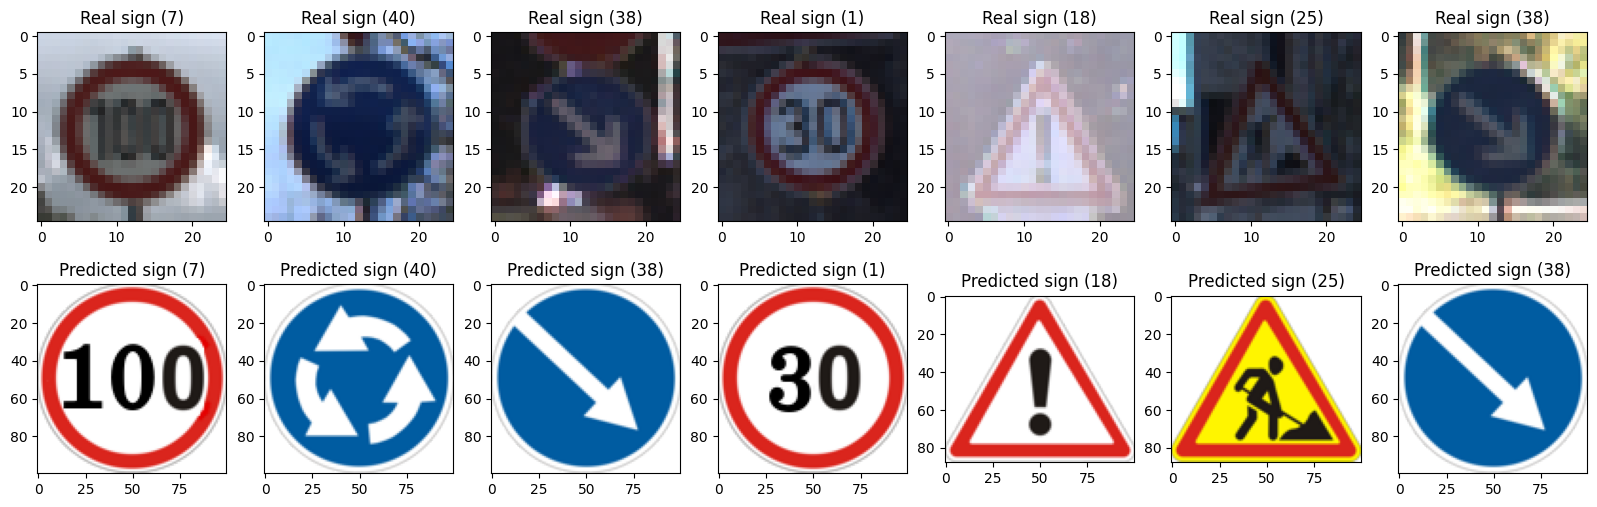

In [45]:
# Display random images with the associated predicted sign
nbr_img_display = 7
nbr_img_array = np.random.randint(0,len(X_test)-1, nbr_img_display)
pred_sign(X_test[nbr_img_array])

### Convert the model to Tensorflow lite model

In [56]:
# Convert the model to TF lite model
path = 'trafic_sign_recognizer'
converter = tf.lite.TFLiteConverter.from_saved_model(path)
tf_lite_model = converter.convert()

In [57]:
# Save the TF lite model
path_tflite = 'traffic_sign_model.tflite'
with open(path_tflite, 'wb') as f:
    f.write(tf_lite_model)

### Load the TF lite model and test it

In [2]:
def pred_tflite(x, path_tflite):
    """ Function to predict the corresponding classes of the input,
    and the probabity of each class."""
    interpreter = tf.lite.Interpreter(model_path = path_tflite)

    # Get input and output tensors.
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]

    # reshape the input, in case if it is just one sample.
    if len(x.shape) == 3:
        x = x.reshape(1, 25, 25, 3)

    # resize the input tensor, and allocate tensors
    interpreter.resize_tensor_input(input_details['index'], x.shape)
    interpreter.allocate_tensors()
    # input_details[0]['index'] = the index which accepts the input
    interpreter.set_tensor(input_details['index'], x.astype(input_details["dtype"]))

    # run the inference
    interpreter.invoke()

    # output_details[0]['index'] = the index which provides the input
    pred_output = interpreter.get_tensor(output_details['index'])
    pred_cl = np.argmax(pred_output, axis=1)
    print('input type:',input_details["dtype"])
    print('output type:',output_details["dtype"])
    
    return pred_cl, pred_output

In [10]:
# Test the pred_tflite function and evaluate the tf model
path_tflite = 'traffic_sign_model.tflite'
y_pred = pred_tflite(X_test, path_tflite)[0]
accuracy = round(accuracy_score(y_test, y_pred), 4) * 100
print(f'The accuracy of the model: {accuracy} %.\n')

input type: <class 'numpy.float32'>
output type: <class 'numpy.float32'>
The accuracy of the model: 99.58 %.



In [23]:
index_test = 15
pred_class = pred_tflite(X_test[index_test], path_tflite)[0]
real_class = y_test[index_test]
print(f"The predicted class is: {pred_class}, and the real class is: {real_class}")

input type: <class 'numpy.float32'>
output type: <class 'numpy.float32'>
The predicted class is: [9], and the real class is: 9
